In [1]:
import pandas as pd
import gensim
from gensim import corpora
from pprint import pprint
import tqdm
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
from textblob import TextBlob   # for smarter sentence parsing !!!

c:\users\princ3\anaconda3\envs\tfconda\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_pickle('./input/squad_contxt.pkl')

In [3]:
df.head()

,title,title_no,context_no,context
1,Beyoncé,1,1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
2,Beyoncé,1,2,Following the disbandment of Destiny's Child i...
3,Beyoncé,1,3,"A self-described ""modern-day feminist"", Beyonc..."
4,Beyoncé,1,4,"Beyoncé Giselle Knowles was born in Houston, T..."
5,Beyoncé,1,5,Beyoncé attended St. Mary's Elementary School ...


In [4]:
data = df.loc[df['title_no']==1]['context']
TB = TextBlob('')
for i in data:
    TB = TB +  TextBlob(i)

In [5]:
sentx = []
charx = []
for i in TB.sentences:
    sentx.append(i.words)
    charx.append(list(i))

## Word2Vec

In [6]:
from gensim.models import Word2Vec
model = Word2Vec(sentx, min_count=1,size = 100)
model_c = Word2Vec(charx,min_count=1,size = 10)
print(model_c)

Word2Vec(vocab=89, size=10, alpha=0.025)


In [7]:
words = list(model.wv.vocab)
chars = list(model_c.wv.vocab)

In [12]:
print(model_c['S'])

[-9.1011816e-04 -4.2800087e-01  2.0806924e-01  6.0285836e-01
 -5.2451622e-02 -2.0787571e-01 -4.4881675e-01  1.9996679e-01
  1.0936300e+00 -4.0964115e-01]


In [10]:
model_c.save('model_c.bin')
model.save('model.bin')

In [10]:
new_model = Word2Vec.load('model_c.bin')
print(new_model)

Word2Vec(vocab=89, size=10, alpha=0.025)


c:\users\princ3\anaconda3\envs\tfconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[':', '0', 'U', 'q', 'ˈ', '(', 'G', '.', 'a', 'w', 'Z', '6', 'e', 'Y', '1', '5', 'ː', 'N', 'C', '"', ',', '3', 'J', 'D', 'è', 'u', 'é', '–', '[', ' ', '#', 'Q', 'p', '-', 'c', ';', 'f', 'L', '%', 'H', 'h', 'z', 'ɪ', 'y', 'R', '?', 'W', 'ɒ', 'F', 'n', 'o', 'X', 'I', '9', 'S', 'l', '/', '2', 'b', 'K', 'A', 's', 'v', '4', 'r', 'i', '&', 't', 'P', '$', 'j', 'm', "'", 'à', '—', '8', 'O', '7', 'k', 'V', 'T', 'd', 'g', 'M', ']', 'E', 'x', 'B', ')']


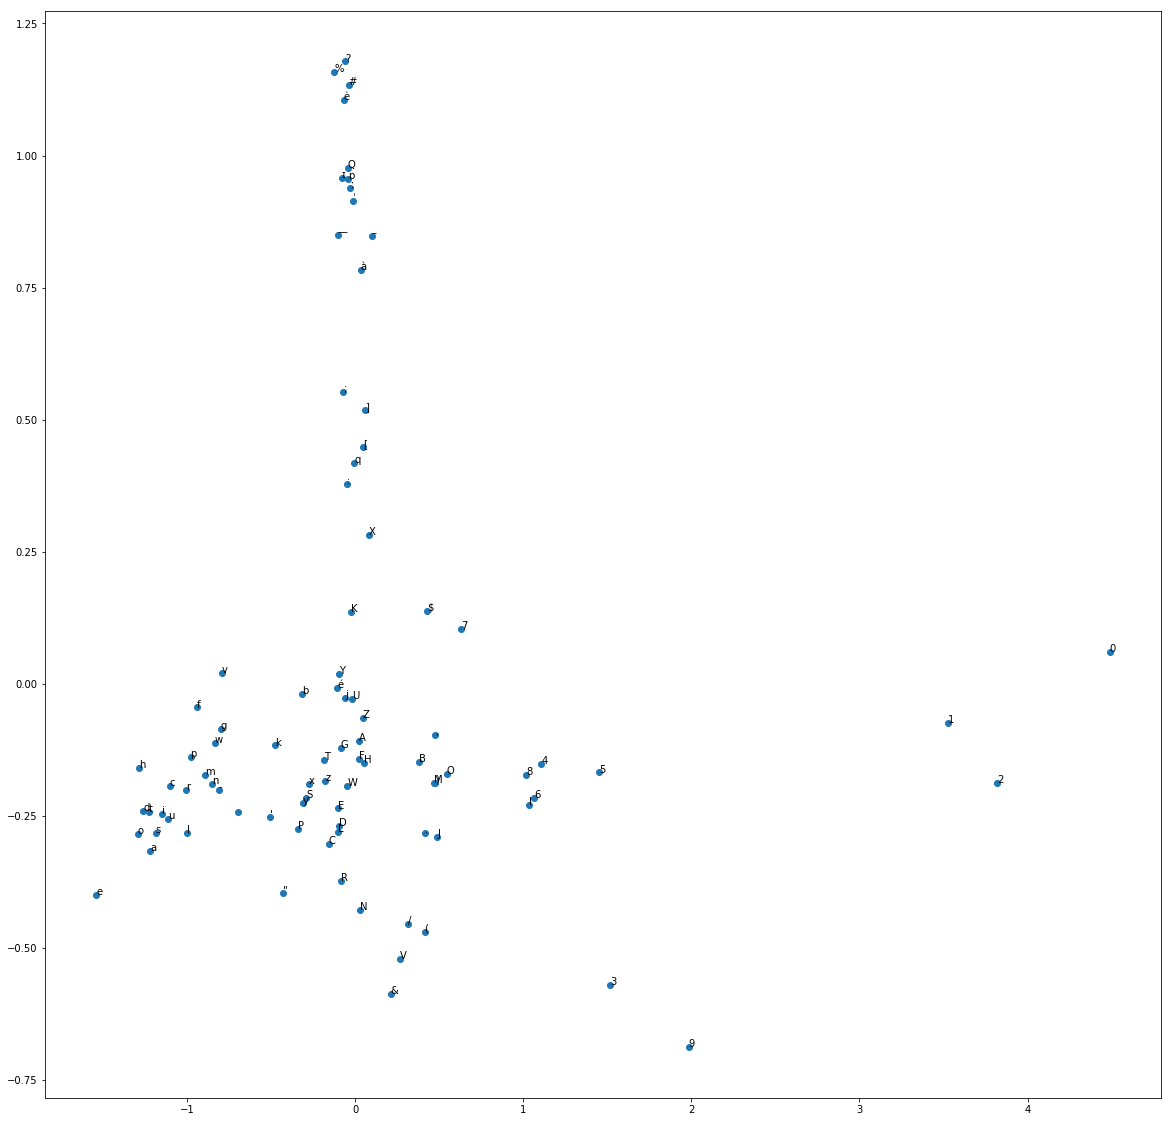

In [12]:
# from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
pyplot.figure(figsize=(20,20))
# fit a 2d PCA model to the vectors
X = model_c[model_c.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
print(chars)
for i, word in enumerate(chars):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()